# Быстрая гистограмма
- Реализовать свою функцию построения дискретного распределения.
- С помощью результатов своего алгоритма и plt.bar построим гистограмму по массиву из 50+ случайных чисел.
- Сравним скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. Напишем decorator timer

In [5]:
def timer(number):
    def decorator(func):
        import time

        def wrapper(*args, **kwargs):
            result = 0
            for i in range(0, number):
                start = time.time()
                func(*args, **kwargs)
                end = time.time()
                result += end - start
            print("Method: ", func.__name__, ", Time:", result / number)
            return func(*args, **kwargs)

        return wrapper

    return decorator

In [6]:
from typing import List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np

@timer(1)
def fast_hist(arr: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param arr: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_val = min(arr)
    max_val = max(arr)
    step = (max_val - min_val) / bins
    bins_labels = [min_val + i * step for i in range(bins)]
    bins_labels.append(max_val)
    bins_values = [0] * bins
    for val in arr:
        for i in range(bins):
            if bins_labels[i] <= val < bins_labels[i + 1]:
                bins_values[i] += 1
            if i + 1 == len(bins_labels) - 1 and bins_labels[i + 1] == val:
                bins_values[i] += 1
    return bins_values, bins_labels

@timer(1)
def hist(arr, bins):
    return plt.hist(arr, bins=bins)

Method:  fast_hist , Time: 0.009094715118408203
Значения колонок: [2, 2, 0, 2, 1, 0, 1, 0, 1, 4, 1, 4, 0, 2, 0, 0, 2, 4, 0, 1, 1, 2, 1, 2, 1, 0, 3, 3, 2, 3, 0, 2, 4, 1, 2, 1, 1, 2, 1, 1, 0, 3, 4, 0, 2, 2, 4, 3, 4, 2, 0, 0, 0, 2, 1, 0, 3, 2, 1, 4, 3]
Названия колонок: [1.0, 2.6065573770491803, 4.213114754098361, 5.8196721311475414, 7.426229508196721, 9.032786885245901, 10.639344262295083, 12.245901639344263, 13.852459016393443, 15.459016393442623, 17.065573770491802, 18.672131147540984, 20.278688524590166, 21.885245901639344, 23.491803278688526, 25.098360655737704, 26.704918032786885, 28.311475409836067, 29.918032786885245, 31.524590163934427, 33.131147540983605, 34.73770491803279, 36.34426229508197, 37.950819672131146, 39.55737704918033, 41.16393442622951, 42.77049180327869, 44.377049180327866, 45.98360655737705, 47.59016393442623, 49.19672131147541, 50.80327868852459, 52.40983606557377, 54.01639344262295, 55.622950819672134, 57.22950819672131, 58.83606557377049, 60.442622950819676, 62

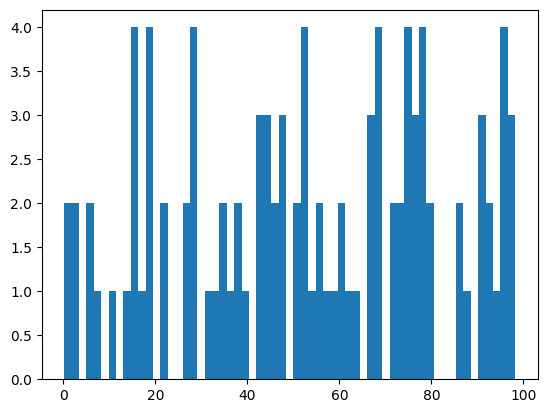

In [7]:
import numpy.random as rand

array = rand.randint(low=0, high=100, size=100)

value_counts, bins_names = fast_hist(array, bins=len(set(array)))

plt.bar(bins_names[:-1], value_counts, width=bins_names[1] - bins_names[0])

print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

Method:  hist , Time: 0.061882972717285156
Значения колонок: [2. 2. 0. 2. 1. 0. 1. 0. 1. 4. 1. 4. 0. 2. 0. 0. 2. 4. 0. 1. 1. 2. 1. 2.
 1. 0. 3. 3. 2. 3. 0. 2. 4. 1. 2. 1. 1. 2. 1. 1. 0. 3. 4. 0. 2. 2. 4. 3.
 4. 2. 0. 0. 0. 2. 1. 0. 3. 2. 1. 4. 3.]
Названия колонок: [ 1.          2.60655738  4.21311475  5.81967213  7.42622951  9.03278689
 10.63934426 12.24590164 13.85245902 15.45901639 17.06557377 18.67213115
 20.27868852 21.8852459  23.49180328 25.09836066 26.70491803 28.31147541
 29.91803279 31.52459016 33.13114754 34.73770492 36.3442623  37.95081967
 39.55737705 41.16393443 42.7704918  44.37704918 45.98360656 47.59016393
 49.19672131 50.80327869 52.40983607 54.01639344 55.62295082 57.2295082
 58.83606557 60.44262295 62.04918033 63.6557377  65.26229508 66.86885246
 68.47540984 70.08196721 71.68852459 73.29508197 74.90163934 76.50819672
 78.1147541  79.72131148 81.32786885 82.93442623 84.54098361 86.14754098
 87.75409836 89.36065574 90.96721311 92.57377049 94.18032787 95.78688525
 97.3

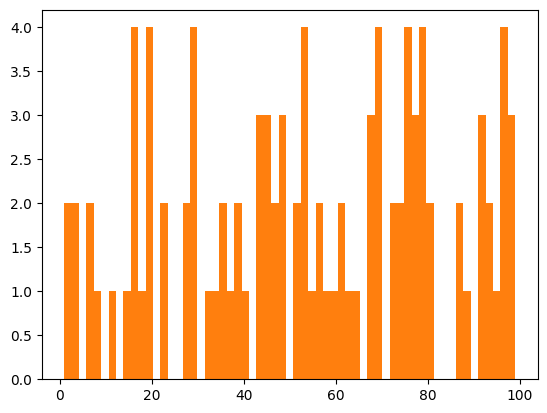

In [8]:
value_counts, bins_names, visual_figure = hist(array, bins=len(set(array)))
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)